In [1]:
import numpy as np
import tables as tb
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#mkdir data

In [3]:
path = './data/'
filename = path + 'tab.h5'
h5 = tb.open_file(filename, 'w')

In [4]:
rows = 2000000

In [43]:
row_des = {
    'Date': tb.StringCol(26, pos=1),
    'No1': tb.IntCol(pos=2),
    'No2': tb.IntCol(pos=3),
    'No3': tb.Float64Col(pos=4),
    'No4': tb.Float64Col(pos=5), 
    }

In [6]:
filters = tb.Filters(complevel=0)
tab = h5.create_table('/', 'ints_floats', row_des, title='Integers and Floats', expectedrows=rows, filters=filters)

In [22]:
tab

/ints_floats (Table(0,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt='', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [23]:
pointer = tab.row

In [24]:
ran_int = np.random.randint(0, 10000, size=(rows, 2))
ran_flo = np.random.standard_normal((rows, 2)).round(5)

In [25]:
%%time
for i in range(rows):
    pointer['Date'] = dt.datetime.now()
    pointer['No1'] = ran_int[i, 0]
    pointer['No2'] = ran_int[i, 1]
    pointer['No3'] = ran_flo[i, 0]
    pointer['No4'] = ran_flo[i, 1]
tab.flush()

CPU times: user 16.6 s, sys: 407 ms, total: 17 s
Wall time: 17.3 s


In [26]:
tab

/ints_floats (Table(0,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt='', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [27]:
ll $path*

-rw-r--r--  1 shaolongchen  staff  98190858 May 24 22:42 ./data/tab.h5


In [28]:
dty = np.dtype([('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])
sarray = np.zeros(len(ran_int), dtype=dty)

In [29]:
sarray

array([('', 0, 0, 0.0, 0.0), ('', 0, 0, 0.0, 0.0), ('', 0, 0, 0.0, 0.0),
       ..., ('', 0, 0, 0.0, 0.0), ('', 0, 0, 0.0, 0.0),
       ('', 0, 0, 0.0, 0.0)], 
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [30]:
%%time
sarray['Date'] = dt.datetime.now()
sarray['No1'] = ran_int[:, 0]
sarray['No2'] = ran_int[:, 1]
sarray['No3'] = ran_flo[:, 0]
sarray['No4'] = ran_flo[:, 1]

CPU times: user 101 ms, sys: 37.5 ms, total: 139 ms
Wall time: 138 ms


In [31]:
%%time
h5.create_table('/', 'ints_floats_from_array', sarray, title='Integers and Floats', expectedrows=rows, filters=filters)

CPU times: user 38.3 ms, sys: 76.6 ms, total: 115 ms
Wall time: 963 ms


/ints_floats_from_array (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt='', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [32]:
h5

File(filename=./data/tab.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/ints_floats (Table(0,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt='', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)
/ints_floats_from_array (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt='', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [33]:
h5.remove_node('/', 'ints_floats_from_array')

In [42]:
tab[:3]

array([], 
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [35]:
tab[:4]['No4']

array([], dtype=float64)

In [38]:
%time np.sum(tab[:]['No3'])

CPU times: user 231 µs, sys: 1.05 ms, total: 1.28 ms
Wall time: 1.28 ms


0.0

In [39]:
%time np.sum(np.sqrt(tab[:]["No1"]))

CPU times: user 136 µs, sys: 53 µs, total: 189 µs
Wall time: 177 µs


0.0

0
CPU times: user 136 ms, sys: 8.54 ms, total: 145 ms
Wall time: 141 ms


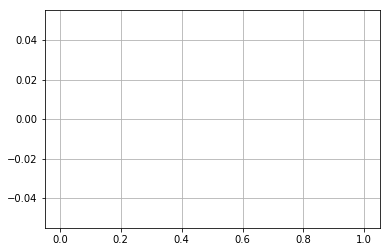

In [41]:
%%time
plt.hist(tab[:]["No3"], bins=30)
plt.grid(True)
print len(tab[:]['No3'])